# Setup


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from task3 import CartPole, CartPoleHat, CartPoleNoisy
import matplotlib.pyplot as plt
import matplotlib


cp = CartPole(False)
cp_hat = CartPoleHat(False)
cp_noisy = CartPoleNoisy(False)

def reset():
    # Call this function before every cell to reset the system
#     cp.delta_time = 0.002 # Adjust cart pole settings to 10 Hz
    cp.reset()
    cp_noisy.reset()
    cp_hat.reset()

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})



### Sanity Check

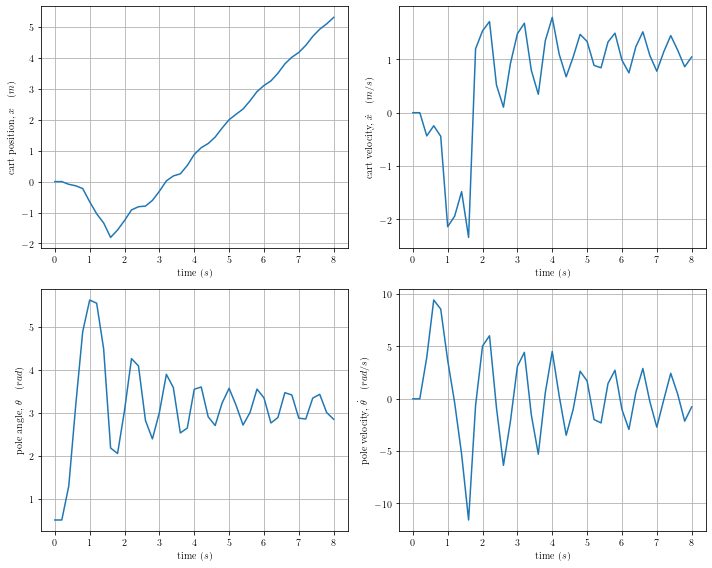

In [3]:
from sanitycheck import rollout

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

cp.sim_steps = 1
cp.delta_time = 0.2
rollout(cp, axs, fig)

fig.tight_layout()




In [154]:
from sanitycheck import optimize_linear_policy2, optimize_linear_policy
import numpy as np
reset()

cp.sim_steps = 50
cp.delta_time = 0.2

x0 = [0, 0, 0.1, 0]
p0 = -np.array([ -0.02533298,  -0.14828819, -12.0167036 ,  -1.7515722])

sol = optimize_linear_policy(cp, x0, p0, n_steps=50)
p_opt = sol.x


Iter 442: [ 0.02628297  0.153849   12.46732999  1.57641498]
Iter 443: [ 0.02628297  0.153849   12.46732999  1.57641498]
Iter 444: [ 0.02628297  0.153849   12.46732999  1.57641498]
Iter 445: [ 0.02669859  0.14979424 13.79104499  1.45599439]
Iter 446: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 447: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 448: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 449: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 450: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 451: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 452: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 453: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 454: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 455: [ 0.02692619  0.15993113 13.18551579  1.40673142]
Iter 456: [ 0.02650292  0.16323084 13.03181348  1.37511877]
Iter 457: [ 0.02650292  0.16323084 13.03181348  1.37511877]
Iter 458: [ 0.02649081  0.16253951 12.95

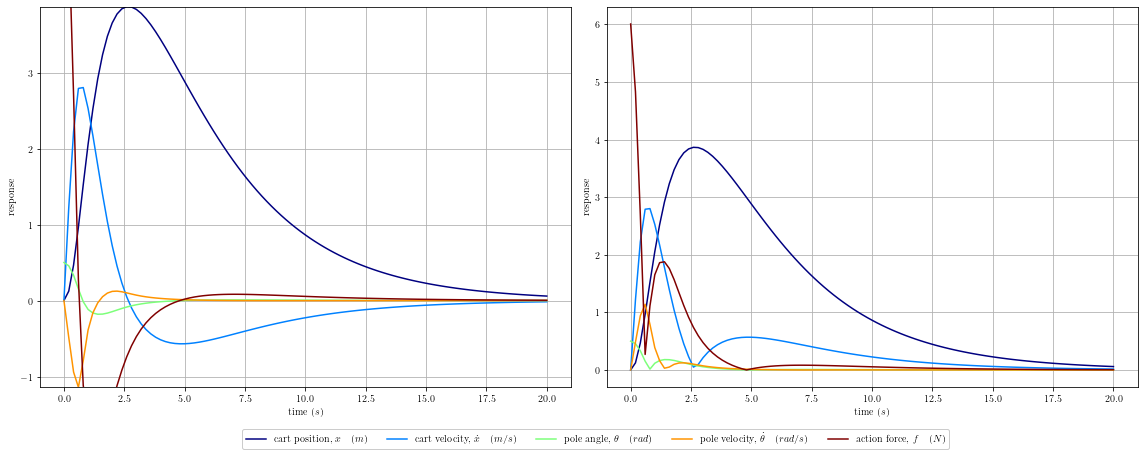

In [150]:
from sanitycheck import linear_model_linear_policy_rollout


reset()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

cp.sim_steps = 50
cp.delta_time = 0.2
linear_model_linear_policy_rollout(cp, x0, p0, fig, axs, n_steps=100)

fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))

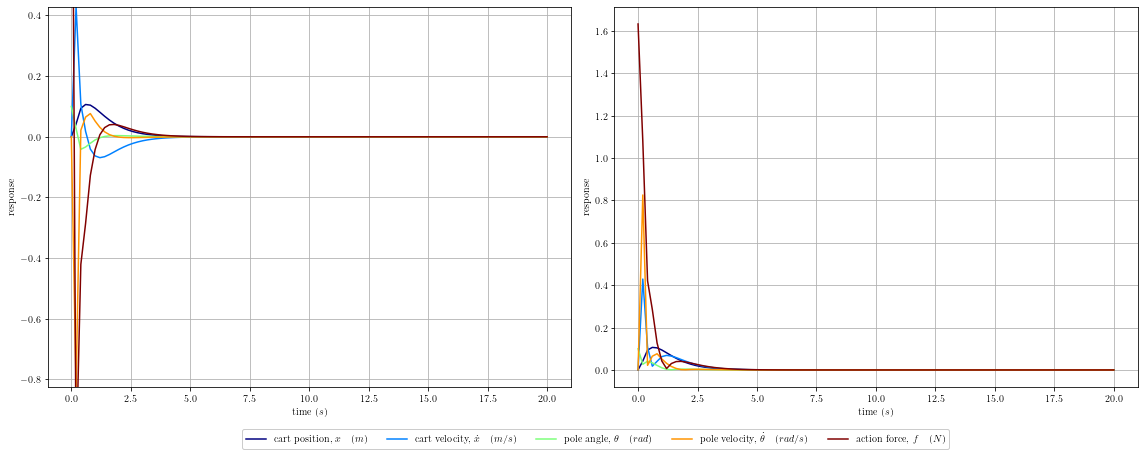

In [155]:
from sanitycheck import linear_model_linear_policy_rollout


reset()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

cp.sim_steps = 50

cp.delta_time = 0.2
linear_model_linear_policy_rollout(cp, x0, p_opt, fig, axs, n_steps=100)

fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))

# Task 3.1

## Observing roll-outs from variable scans

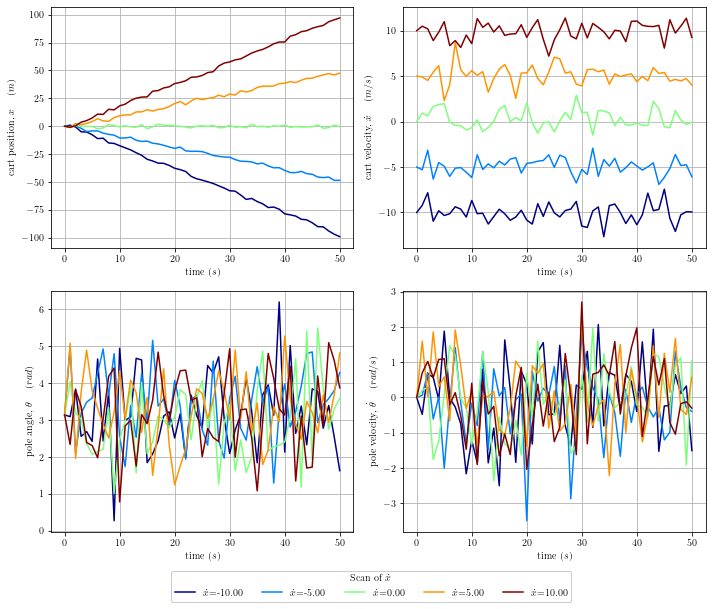

In [39]:
from task3 import t3_1_rollout_scan_cart_velocity

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_1_rollout_scan_cart_velocity(cp_noisy, axs, fig)

lgd = fig.legend(loc="lower center", ncol=6, framealpha=1, title=r"Scan of $\dot x$", bbox_to_anchor=(0.52, -0.06))
fig.tight_layout()
fig.savefig("./assets3/task3_1__1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



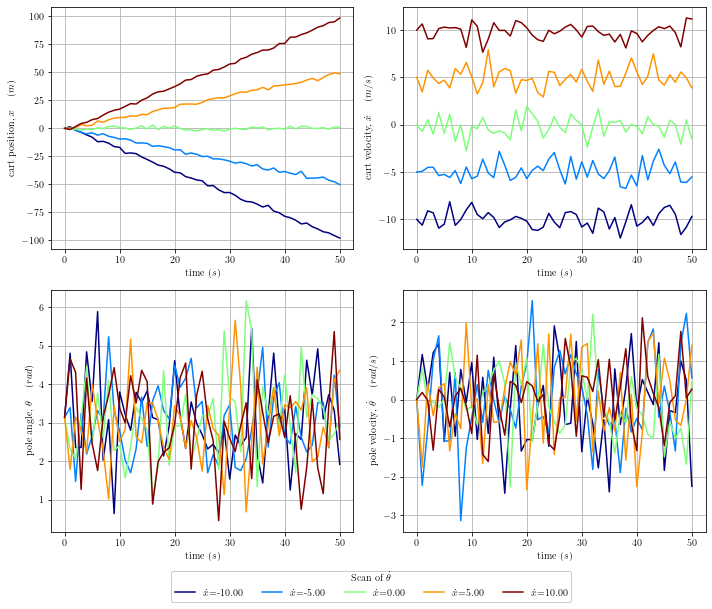

In [38]:
from task3 import t3_1_rollout_scan_pole_velocity

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_1_rollout_scan_cart_velocity(cp_noisy, axs, fig)

lgd = fig.legend(loc="lower center", ncol=6, framealpha=1, title=r"Scan of $\dot \theta$", bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets3/task3_1__2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



## Fitting linear model

/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/task3.py:208: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W, residuals, rank, s = np.linalg.lstsq(X, Y)


SE: [ 2276.22595621  5479.08091634  2238.86518875 32784.42459254]


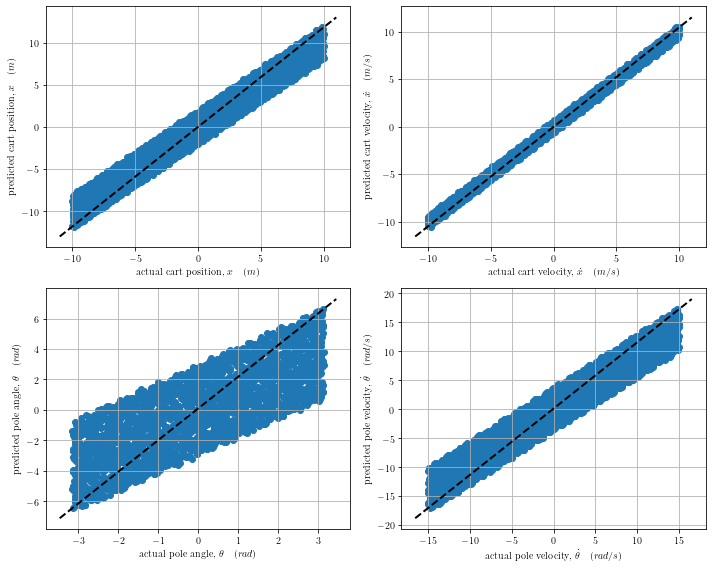

In [66]:
from task3 import t3_1_fit_linear_model

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x ,y, w, residuals = t3_1_fit_linear_model(cp_noisy, axs, fig, n=11)

fig.savefig("./assets3/task3_1__11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



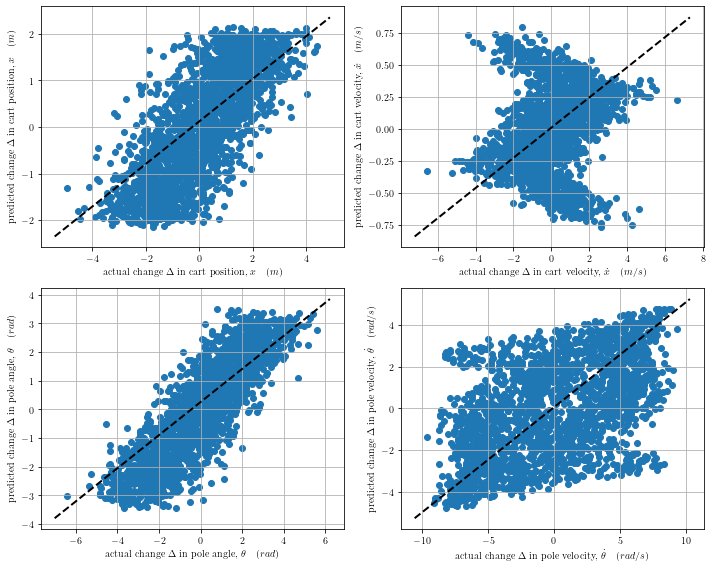

In [67]:
# Plot change instead

from task3 import t3_1_fit_linear_model_change_plotter

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_1_fit_linear_model_change_plotter(x, y, w, fig, axs, diag=True)

fig.savefig("./assets3/task3_1__14.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


### Experimenting with random sampling and manual lstsq

/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/task3.py:229: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  X1 = rng.random(size) * (VEL_HIGH - VEL_LOW) + VEL_LOW


SE: [ 2253.97444711  5392.76029916  2288.26050809 32153.9874619 ]


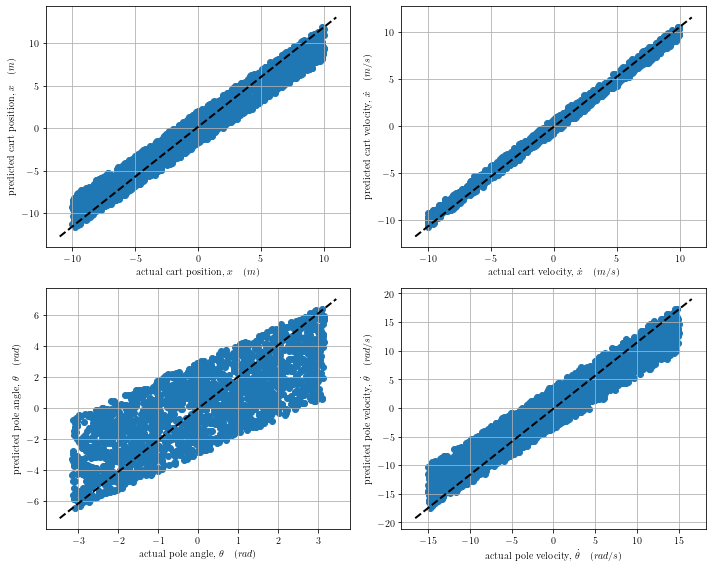

In [69]:
# Try with random sampling and not sobol

from task3 import t3_1_fit_linear_model_random

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x ,y, w, residuals = t3_1_fit_linear_model_random(cp_noisy, axs, fig, n=11)

fig.savefig("./assets3/task3_1__12.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



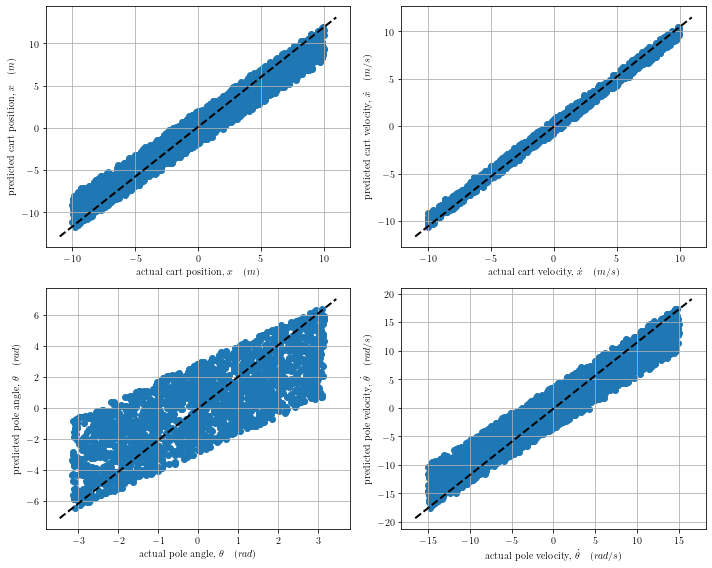

In [71]:
# Try with random sampling with manual least squares

from task3 import t3_1_fit_linear_model_random_manual_lstsq

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x ,y, w = t3_1_fit_linear_model_random_manual_lstsq(cp_noisy, axs, fig, n=11)

fig.savefig("./assets3/task3_1__13.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



## Fitting non-linear model

/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/task3.py:318: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return cp.getStateNoisy(loc=0, scale=1) - X # Change in state


SE: [1768.28412075 1829.27334599 1675.08202702 2240.50074026]


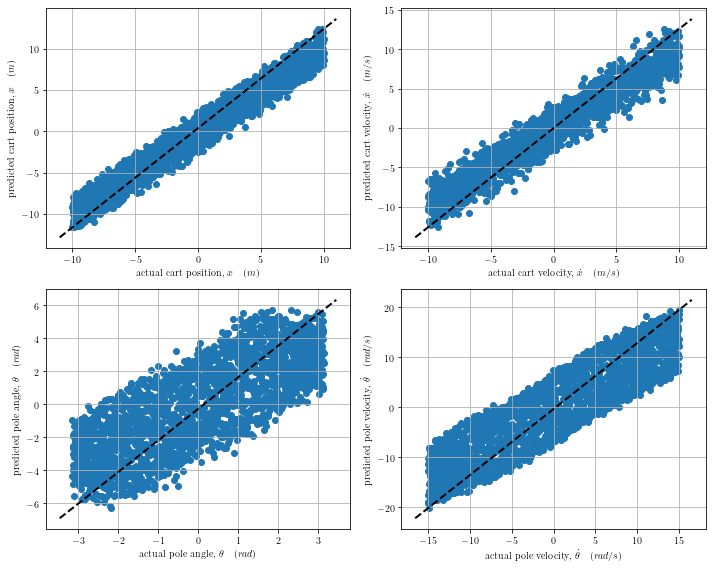

In [73]:
from task3 import t3_1_fit_non_linear_model

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x ,y, w, xi, k_nm, sigma, residuals = t3_1_fit_non_linear_model(cp_noisy, axs, fig, n=11, m=5)

fig.savefig("./assets3/task3_1__21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


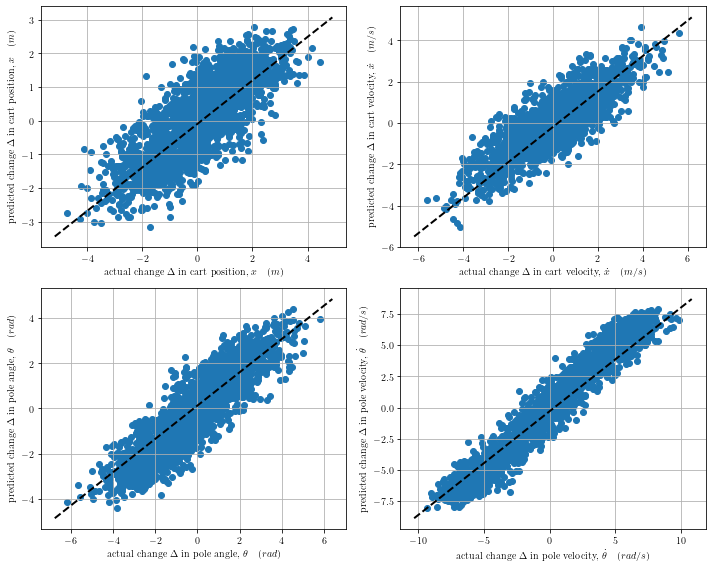

In [74]:
from task3 import t3_1_fit_non_linear_model_change_plotter

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_1_fit_non_linear_model_change_plotter(x ,y, w, xi, k_nm, sigma, fig, axs)

fig.savefig("./assets3/task3_1__22.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


## Fitting a linear policy

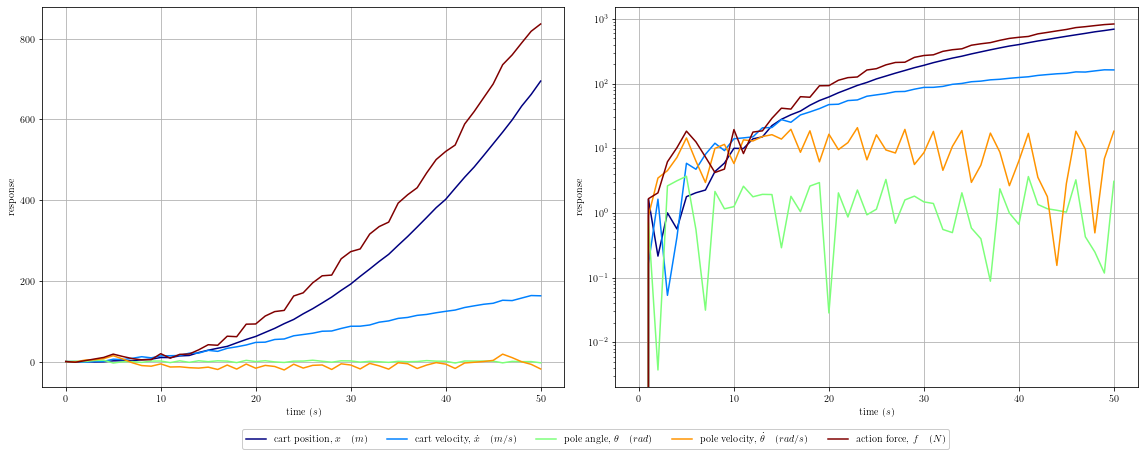

In [16]:
from task3 import t3_1_linear_model_linear_policy_rollout

reset()
fig, ax = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

p = [1, 1, 1, 1] # Unoptimized policy
t3_1_linear_model_linear_policy_rollout(cp_noisy, p, fig, ax)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets3/task3_1__31.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


In [23]:
from task3 import optimize_linear_policy_noisy_obs, UNSTABLE_EQ

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

# From previous, each oscillation takes about 7 steps, so 14 steps in total for 2 oscillations
p_opt = optimize_linear_policy_noisy_obs(cp_noisy, x0, p0, n_steps=14)



Iter   0: [1.025 1.025 1.025 1.025]
Iter   1: [1.025 1.025 1.025 1.025]
Iter   2: [1.025 1.025 1.025 1.025]
Iter   3: [1.025 1.025 1.025 1.025]
Iter   4: [1.025 1.025 1.025 1.025]
Iter   5: [1.025 1.025 1.025 1.025]
Iter   6: [1.025 1.025 1.025 1.025]
Iter   7: [1.025 1.025 1.025 1.025]
Iter   8: [1.025 1.025 1.025 1.025]
Iter   9: [1.025 1.025 1.025 1.025]
Iter  10: [1.02912598 1.02473145 1.02106934 1.02365723]
Iter  11: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  12: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  13: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  14: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  15: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  16: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  17: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  18: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  19: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  20: [1.02706299 1.02486572 1.02303467 1.02432861]
Iter  21: [1.02706299 1.

Iter 255: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 256: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 257: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 258: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 259: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 260: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 261: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 262: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 263: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 264: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 265: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 266: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 267: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 268: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 269: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 270: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 271: [1.027063   1.02486571 1.02303467 1.02432858]
Iter 272: [1.027063   1.02486571 1.02303467 1.02

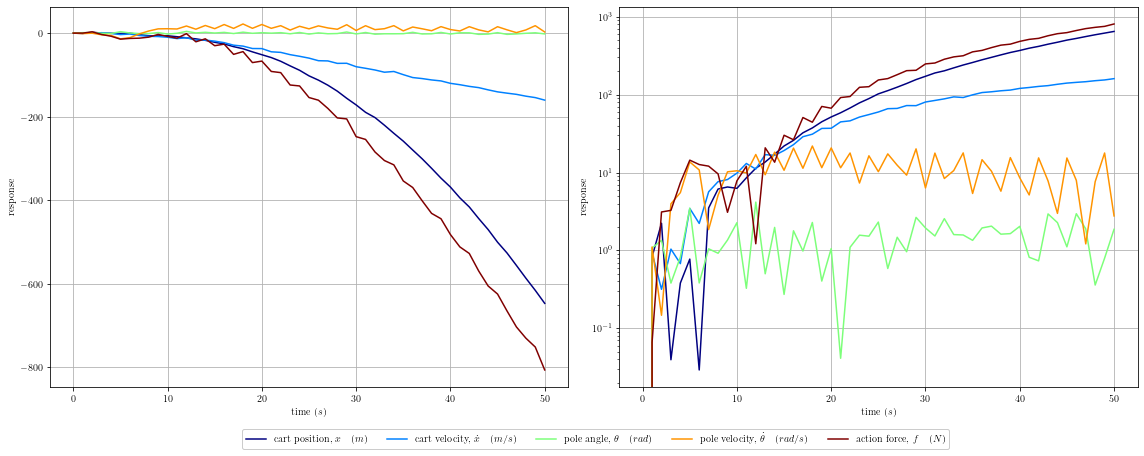

In [24]:
from task3 import t3_1_linear_model_linear_policy_rollout

reset()
fig, ax = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

t3_1_linear_model_linear_policy_rollout(cp_noisy, p_opt, fig, ax, n_steps=50)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets3/task3_1__32.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


In [53]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

px12, py12, pz12, p_opt_hist12 = optimize_linear_policy_noisy_obs_scan_2d(cp_noisy, x0, 1, 2, p0, n_steps=14)


[autoreload of task3 failed: Traceback (most recent call last):
  File "/Users/chongzhenyuen/miniforge3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/chongzhenyuen/miniforge3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/chongzhenyuen/miniforge3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpol

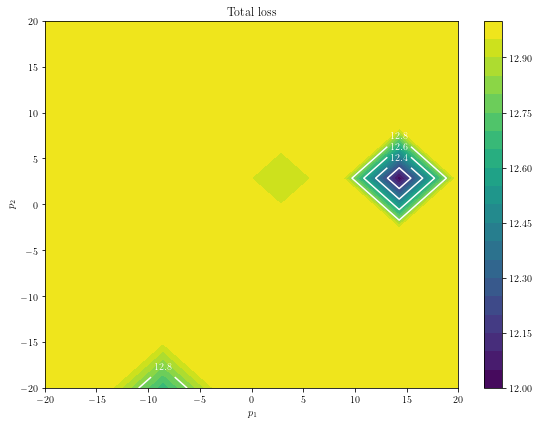

In [54]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d_plotter

fig, ax = plt.subplots(1, 1, figsize=(8, 6), layout='tight')

optimize_linear_policy_noisy_obs_scan_2d_plotter(px12, py12, pz12, 1, 2, fig, ax)
fig.savefig("./assets3/task3_1__41.png", bbox_inches='tight')


In [55]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

px13, py13, pz13, p_opt_hist13 = optimize_linear_policy_noisy_obs_scan_2d(cp_noisy, x0, 1, 3, p0, n_steps=14)


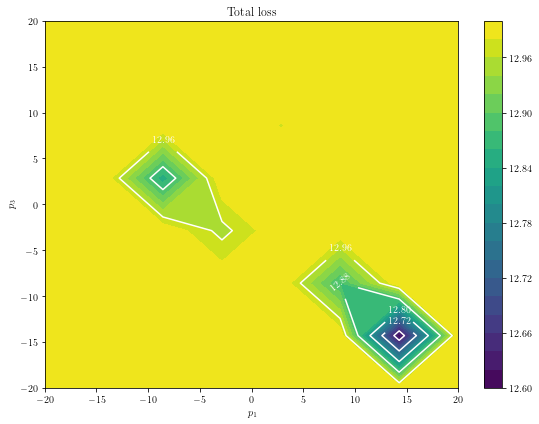

In [56]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d_plotter

fig, ax = plt.subplots(1, 1, figsize=(8, 6), layout='tight')

optimize_linear_policy_noisy_obs_scan_2d_plotter(px13, py13, pz13, 1, 3, fig, ax)
fig.savefig("./assets3/task3_1__42.png", bbox_inches='tight')


In [36]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

px23, py23, pz23, p_opt_hist23 = optimize_linear_policy_noisy_obs_scan_2d(cp_noisy, x0, 2, 3, p0, n_steps=14)


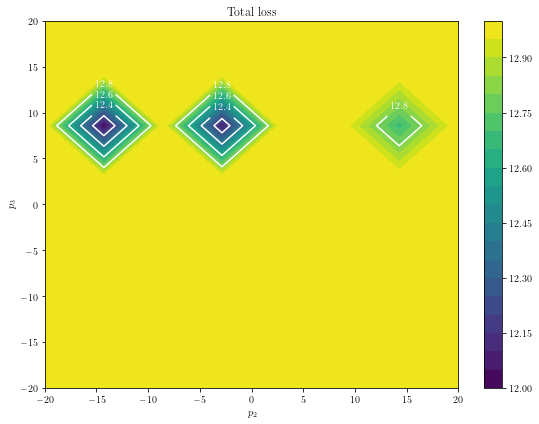

In [37]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d_plotter

fig, ax = plt.subplots(1, 1, figsize=(8, 6), layout='tight')

optimize_linear_policy_noisy_obs_scan_2d_plotter(px23, py23, pz23, 2, 3, fig, ax)
fig.savefig("./assets3/task3_1__43.png", bbox_inches='tight')


### 3D Scatter

In [40]:
from task3 import optimize_linear_policy_noisy_obs_scan_3d

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

pw123, px123, py123, pz123, p_opt_hist123 = optimize_linear_policy_noisy_obs_scan_3d(cp_noisy, x0, 1, 2, 3, p0, n_steps=14)


Optimal P: (1, 20.0, 6.666666666666668, -6.666666666666666)


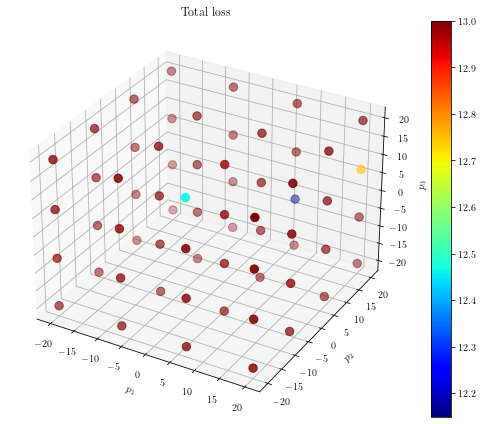

In [64]:
from task3 import optimize_linear_policy_noisy_obs_scan_3d_plotter

fig = plt.figure(figsize=(8, 6), layout='tight')
ax = fig.add_subplot(projection='3d')

optimize_linear_policy_noisy_obs_scan_3d_plotter(pw123, px123, py123, pz123, 1, 2, 3, fig, ax)
fig.savefig("./assets3/task3_1__44.png", bbox_inches='tight')


# Task 3.2

### Linear model

SE: [ 4147.05284792  7455.72963143  4312.47410079 34408.04030832]


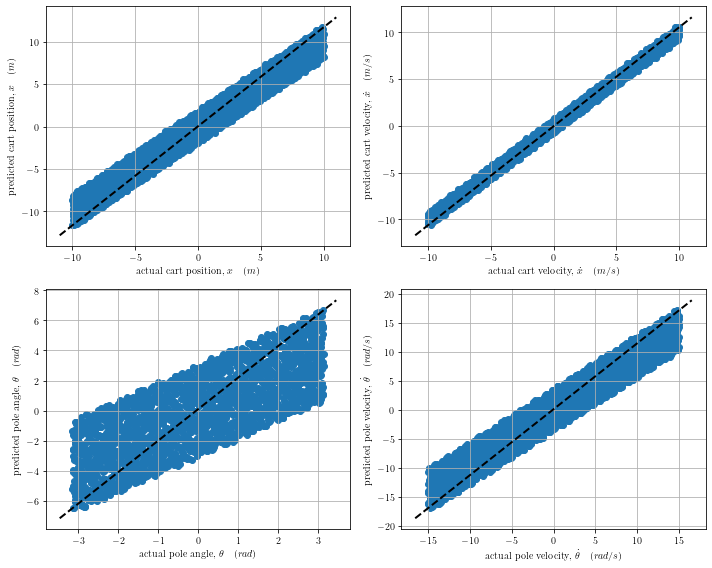

In [68]:
from task3 import t3_2_fit_linear_model

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x ,y, w, residuals = t3_2_fit_linear_model(cp_noisy, axs, fig, n=11)

fig.savefig("./assets3/task3_2__1.png", bbox_inches='tight')



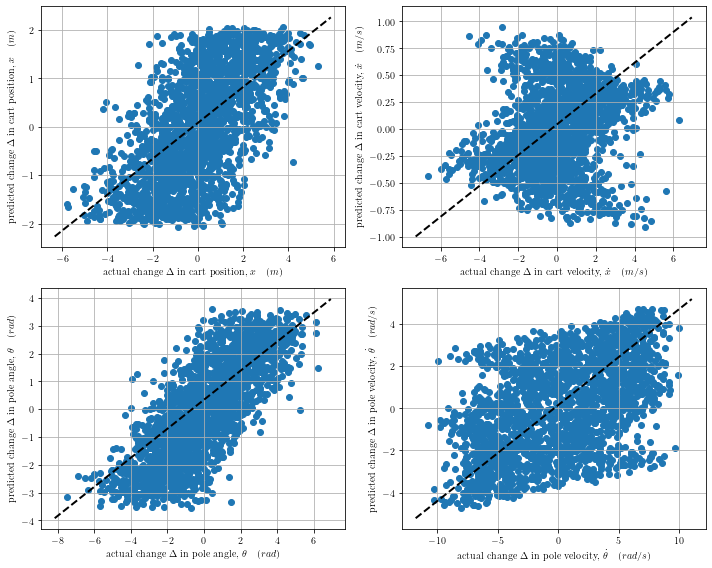

In [70]:
# Plot change instead

from task3 import t3_2_fit_linear_model_change_plotter

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_2_fit_linear_model_change_plotter(x, y, w, fig, axs, diag=True)

fig.savefig("./assets3/task3_2__2.png", bbox_inches='tight')


### Non-linear model

/Users/chongzhenyuen/Library/CloudStorage/OneDrive-UniversityofCambridge/2A/SF3-Project-Machine-Learning-Cartpole-Duplicate/task3.py:668: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W, residuals, rank, s = np.linalg.lstsq(K_NM, Y)


SE: [3569.03252221 3457.73824654 3611.1885545  4032.6712321 ]


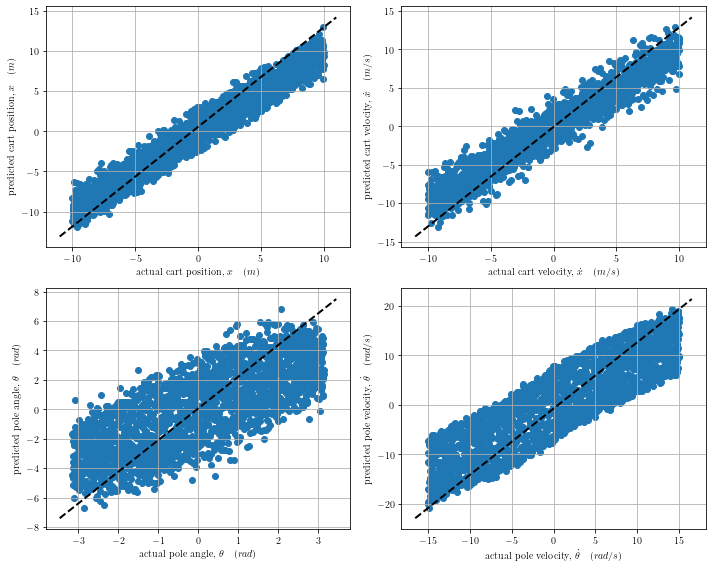

In [74]:
from task3 import t3_2_fit_non_linear_model

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x ,y, w, xi, k_nm, sigma, residuals = t3_2_fit_non_linear_model(cp_noisy, axs, fig, n=11, m=5)

fig.savefig("./assets3/task3_2__11.png", bbox_inches='tight')


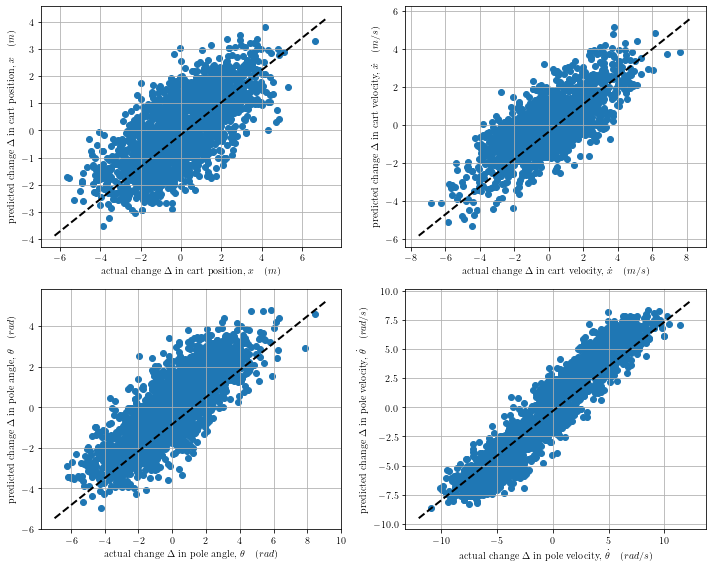

In [75]:
from task3 import t3_2_fit_non_linear_model_change_plotter

reset()
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_2_fit_non_linear_model_change_plotter(x ,y, w, xi, k_nm, sigma, fig, axs)

fig.savefig("./assets3/task3_2__12.png", bbox_inches='tight')


### Linear policy

In [78]:
from task3 import optimize_linear_policy_noisy_dyn, UNSTABLE_EQ

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

# From previous, each oscillation takes about 7 steps, so 14 steps in total for 2 oscillations
p_opt = optimize_linear_policy_noisy_dyn(cp_noisy, x0, p0, n_steps=14)



Iter   0: [1. 1. 1. 1.]
Iter   1: [1. 1. 1. 1.]
Iter   2: [1. 1. 1. 1.]
Iter   3: [1.0140625 1.0046875 1.0046875 0.996875 ]
Iter   4: [1.0140625 1.0046875 1.0046875 0.996875 ]
Iter   5: [1.0140625 1.0046875 1.0046875 0.996875 ]
Iter   6: [1.01328125 1.00859375 1.00859375 0.9859375 ]
Iter   7: [1.01328125 1.00859375 1.00859375 0.9859375 ]
Iter   8: [1.01242676 0.99919434 1.00974121 0.99272461]
Iter   9: [1.01242676 0.99919434 1.00974121 0.99272461]
Iter  10: [1.01242676 0.99919434 1.00974121 0.99272461]
Iter  11: [1.01242676 0.99919434 1.00974121 0.99272461]
Iter  12: [1.01242676 0.99919434 1.00974121 0.99272461]
Iter  13: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter  14: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter  15: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter  16: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter  17: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter  18: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter  19: [1.01263123 0.99988098 1.0091095  

Iter 149: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 150: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 151: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 152: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 153: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 154: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 155: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 156: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 157: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 158: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 159: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 160: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 161: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 162: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 163: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 164: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 165: [1.01263123 0.99988098 1.0091095  0.99324341]
Iter 166: [1.01263123 0.99988098 1.0091095  0.99

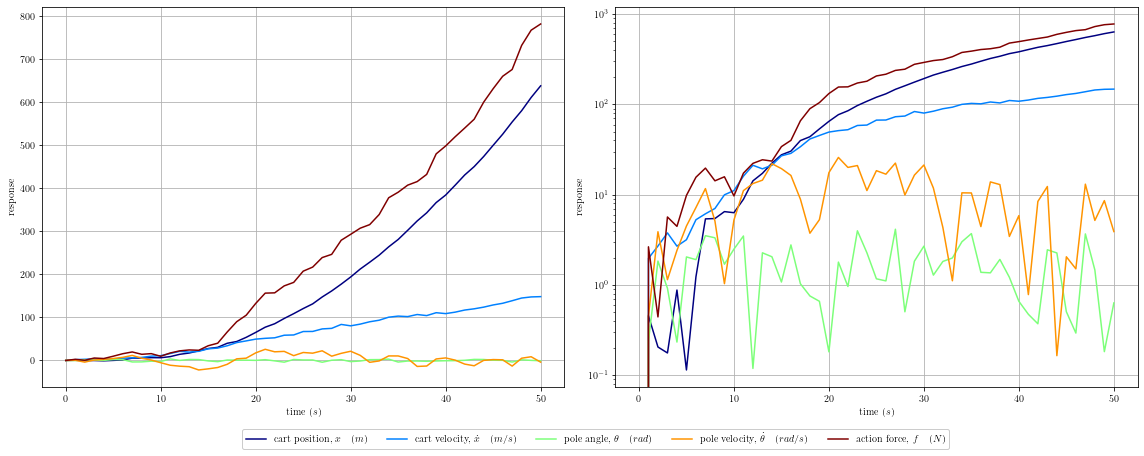

In [79]:
from task3 import t3_2_linear_model_linear_policy_rollout

reset()
fig, ax = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

t3_2_linear_model_linear_policy_rollout(cp_noisy, p_opt, fig, ax, n_steps=50)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets3/task3_2__22.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


In [ ]:
from task3 import optimize_linear_policy_noisy_obs_scan_2d

reset()

p0 = [1, 1, 1, 1] # initial policy
x0 = UNSTABLE_EQ
x0[2] = 0.01 # Small pertubation from equilibrium

px12, py12, pz12, p_opt_hist12 = optimize_linear_policy_noisy_obs_scan_2d(cp_noisy, x0, 1, 2, p0, n_steps=14)


# Task 3.3
